# Práctica 3 | Tecnologías de la Imagen y Vídeo
## Segmentación

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from PIL import Image

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin, reconstruction,
                               opening, closing, dilation, erosion)

from skimage import data, filters
from skimage.util import invert

### Apartado 1) Leer y representar la imagen "riceBGgradient.tif"

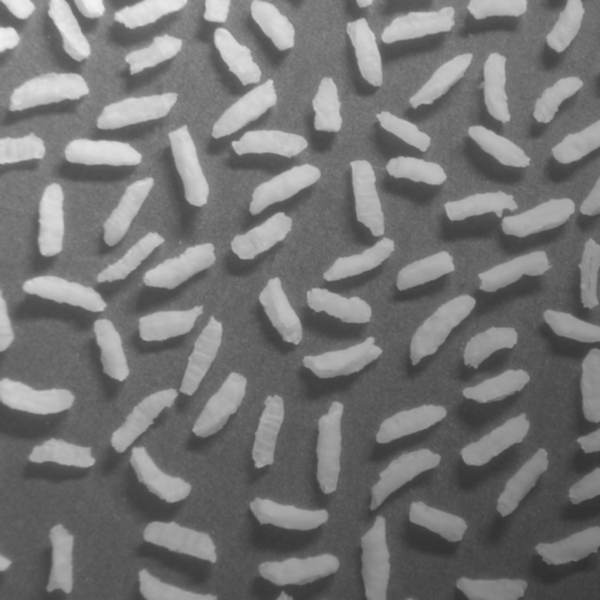

In [37]:
file = 'images/riceBGgradient.tif'
img  = Image.open(file)
display(img)

A priori, ya se puede apreciar que en el cuadrante superior izquierdo la iluminación es mayor que en el cuadrante inferior derecho. Eso va a ser un inconveniente para poder establecer umbrales para separar los granos de arroz del fondo.

### Apartado 2) Intenta separar los granos del fondo estableciendo un umbral.

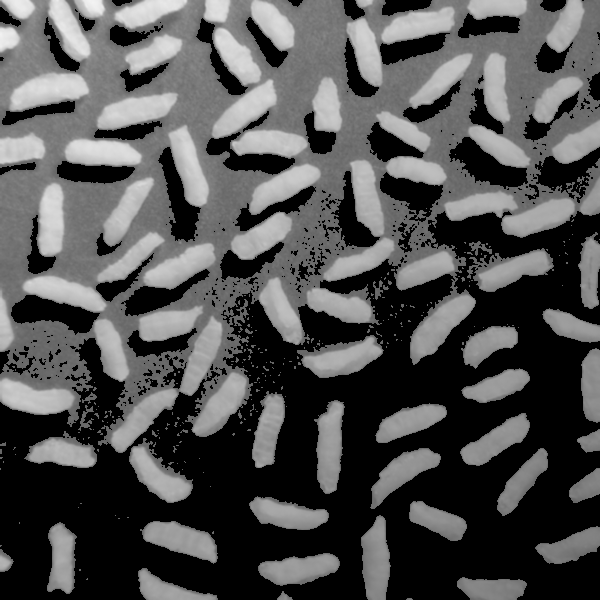

In [38]:
img_np = np.asarray(img)
th = 100
mask = img_np > th
img_seg = img_np*mask
Image.fromarray(img_seg)

En la parte inferior derecha, los granos se han extraído correctamente, pero en la parte superior izquierda apenas se ha podido separar los granos del fondo.

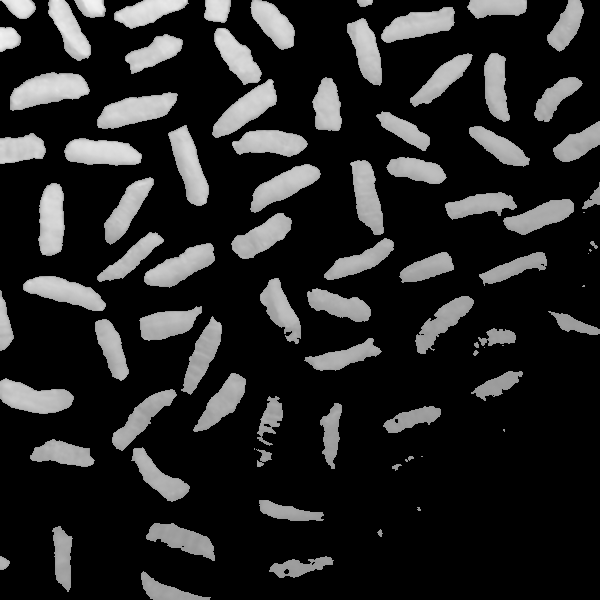

In [39]:
th = 150
mask = img_np > th
img_seg = img_np*mask
Image.fromarray(img_seg)

Siendo más restrictivo con el umbral, se puede conseguir extraer bien los granos en la esquina superior derecha, en detrimento de los granos ubicados abajo a la derecha, que no son extraídos.

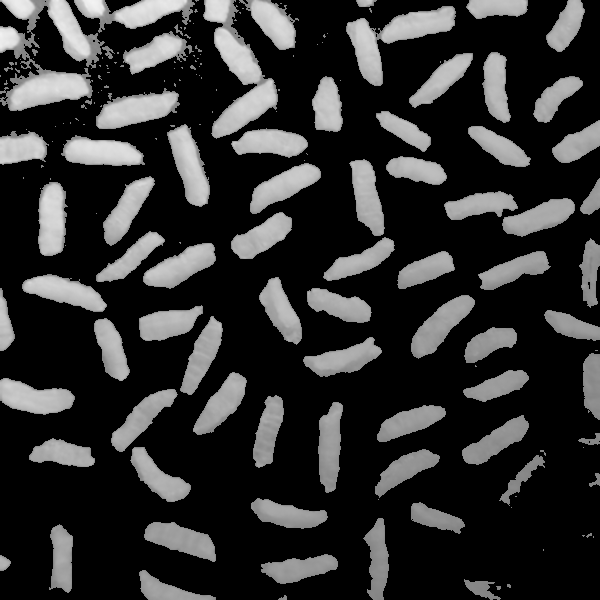

In [40]:
th = 130
mask = img_np > th
img_seg = img_np*mask
Image.fromarray(img_seg)

Este resultado es el más próximo que he conseguido para conseguir separar los granos del fondo. Como era de esperar, hay partes del fondo (en la esquina superior izquierda) que han quedado sin separar y granos (en la esquina inferior derecha) que no se han podido extraer correctamente.

### Apartado 3) Como habrás visto, no es posible obtener un resultado satisfactorio debido a la inhomogeneidad en la iluminación. Utiliza una transformación morfológica top-hat para corregir la iluminación, tal y como se ha hecho en clase.

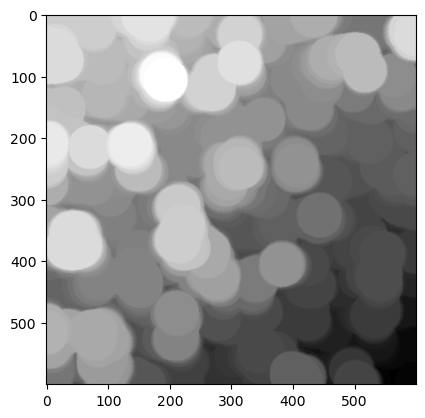

In [41]:
#Estimación del fondo con una apertura
fondo = opening(img_np, disk(35))
plt.imshow(fondo, cmap='gray')

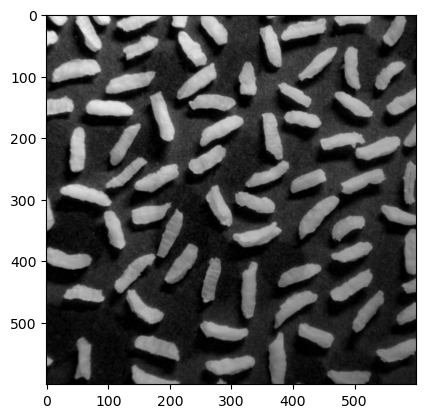

In [42]:
top_hat = img-fondo
plt.imshow(top_hat, cmap='gray')

Por lo general, la imagen se ha oscurecido

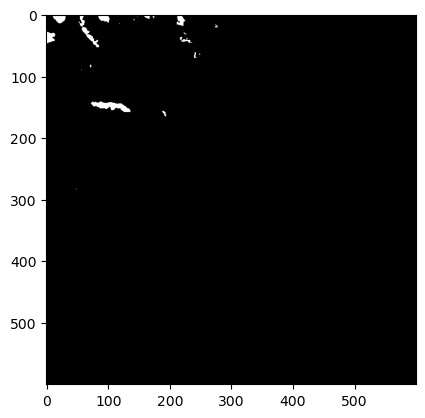

In [43]:
mask = top_hat > th
plt.imshow(mask, cmap='gray')

Al haber aplicado el top_hat, el umbral que teníamos antes ahora resulta muy restrictivo para seleccionar una máscara, pues ahora la imagen es más oscura. El nuevo umbral se obtendrá en el siguiente apartado.

### Apartado 4) Busca ahora un umbral. Para buscar el umbral, puedes ayudarte con la función "skimage.filters.threshold_otsu"

54


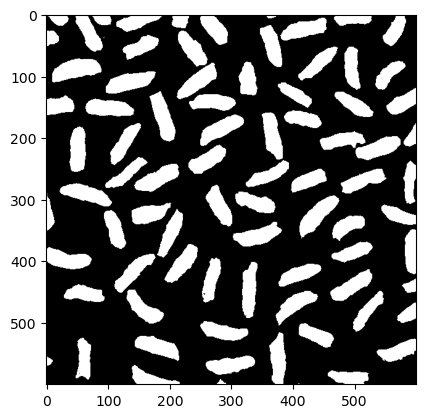

In [44]:
umbral = filters.threshold_otsu(top_hat)  # Calculamos el umbral de Otsu
print(umbral)  # Mostramos el valor del umbral
mask = top_hat > umbral  # Máscara sobre el umbral de Otsu
plt.imshow(mask, cmap="gray")

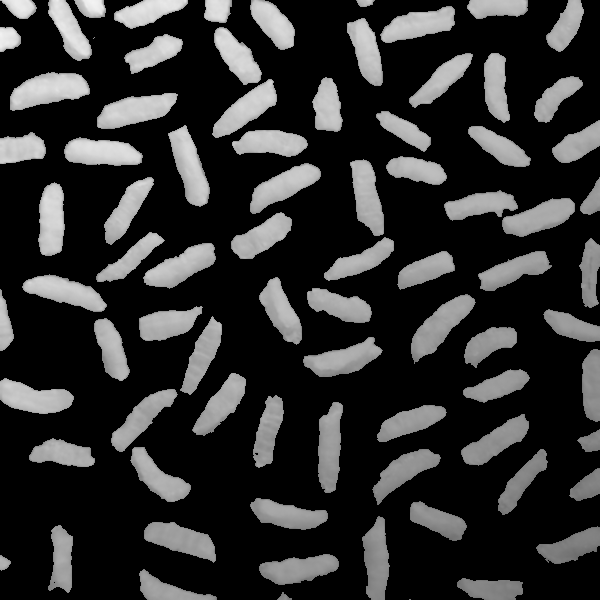

In [45]:
img_seg = img_np*mask
Image.fromarray(img_seg)

Ahora sí se ha conseguido seleccionar en la imagen original únicamente los granos de arroz.